# import

In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
import numpy as np

# tool funcs

In [2]:
def distance(hand_landmarks):
    import math
    x4 = hand_landmarks.landmark[4].x
    y4 = hand_landmarks.landmark[4].y
    x8 = hand_landmarks.landmark[8].x
    y8 = hand_landmarks.landmark[8].y
    try:
        res = math.sqrt((640*(x4-x8))**2+(480*(y4-y8))**2)
    except:
        res = 1000
    return res

In [3]:
def center_point(hand_landmarks):
    x4 = hand_landmarks.landmark[4].x
    y4 = hand_landmarks.landmark[4].y
    x8 = hand_landmarks.landmark[8].x
    y8 = hand_landmarks.landmark[8].y
    point = (1-x4+1-x8)/2*640,(y4+y8)/2*480
#     point = (1-x4)*640,y4*480
    return point

In [4]:
def draw_trace(img,trace):
    points_n = len(trace)
    for idx in range(points_n-1):
        img = cv2.line(img,
                       (int(trace[idx][0]),int(trace[idx][1])),
                       (int(trace[idx+1][0]),int(trace[idx+1][1])),
                       (255, 0, 0), thickness=10)
    return img

In [5]:
class MA():
    def __init__(self,win_N,isMid=False):
        self.win = [40 for i in range(win_N)]
        self.win_N = win_N
        self.isMid = isMid
    def __call__(self,x):
        self.win += [x]
        self.win.pop(0)
        if not self.isMid:
            return np.mean(np.array(self.win),0)
        else:
            return np.median(np.array(self.win),0)

# pipeline

In [6]:
trace = []
def pipeline(image):
    global trace
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
#                 print(distance(hand_landmarks))
            mp_drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    image = cv2.flip(image, 1)
    try:
        dist = round(distance(hand_landmarks),2)
        dist = ma(dist)
        if dist<42:
            center_p = center_point(hand_landmarks)
            trace.append(center_p)
        else:
            trace = []
        image = draw_trace(image,trace)
    except:
        pass

    return image

# observer

In [9]:
ma = MA(20)
cap = cv2.VideoCapture(0)
with mp_hands.Hands(model_complexity=0,
                    min_detection_confidence=0.5,
                    min_tracking_confidence=0.5) as hands:
    while True:
        success, image = cap.read()
        image = pipeline(image)
        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(1) & 0xFF == ord('q'): # 一帧显示一毫秒，通过上面的while循环不断地显示下一帧，从而形成动态的视频；按q键退出循环，关闭视频。
            break
cap.release()
cv2.destroyAllWindows()

In [21]:
hand_landmarks.landmark[0].x

0.30809515714645386

In [38]:
image.shape

(480, 640, 3)

# opencv

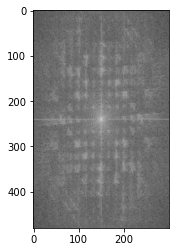

In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg', 0)
rows, cols = img.shape

# size为改变滤波大小
crow, ccol = rows//2, cols//2
sizex = 5
sizey = 5

# DFT的性能优化
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
right = ncols - cols
bottom = nrows - rows
bordertype = cv2.BORDER_CONSTANT   # 只是为了避免PDF文件中的行中断
nimg = cv2.copyMakeBorder(img, 0, bottom, 0, right, bordertype, value=0)

# cv傅里叶变换
dft = cv2.dft(np.float32(nimg), flags=cv2.DFT_COMPLEX_OUTPUT)   # 不优化就选img
dft_shift = np.fft.fftshift(dft)
# 显示傅里叶变换图
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
plt.imshow(magnitude_spectrum, cmap='gray')


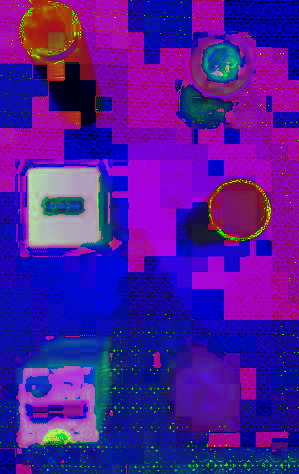

In [105]:
from PIL import Image

img = cv2.imread('test.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img=cv2.medianBlur(img,3)
# # img = cv2.GaussianBlur(img, (3,3), 10)
# img = cv2.Canny(img, 200, 290)

# x = cv2.Sobel(img,cv2.CV_16S,1,0)
# y = cv2.Sobel(img,cv2.CV_16S,0,1)
 
# absX = cv2.convertScaleAbs(x)   # 转回uint8
# absY = cv2.convertScaleAbs(y)
 
# img = cv2.addWeighted(absX,0.5,absY,0.5,0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(hsv[:,:,1],(7,7),0)
img = cv2.Canny(blur, 10, 755)
# img = edged
# kernel_2 = np.ones((4, 4), dtype=np.uint8) # 卷积核变为4*4
# img = cv2.dilate(img, kernel_2, 2)
# kernel_2 = np.ones((4, 4), dtype=np.uint8)
# img = cv2.erode(img, kernel_2, iterations=2)
Image.fromarray(img1)

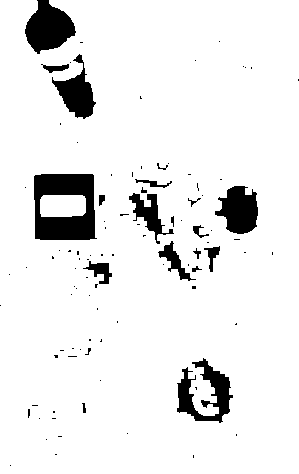

In [68]:
image = cv2.imread('test.jpg')

# blur = cv2.medianBlur(image, 7)
blur=cv2.bilateralFilter(image,40,75,75)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)

canny = cv2.Canny(thresh, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
dilate = cv2.dilate(opening, kernel, iterations=2)
Image.fromarray(dilate)

In [ ]:
Mat srcImage, srcImage2, srcImage3;
for (int j = 1; j <= 172; j++)
{
//白天总共172张图片。1-172；验证：1，162，146;
//(挑选最好的效果作为模板。对比108与117进行分析)。
//if (j == 108 || j == 117)
//{//对比分析之后选择第108张图片作为模板图片
char ch[4096] = { 0 };
sprintf(ch, "..\\findriveredge\\day\\2 (%d).jpg", j);
srcImage = imread(ch, IMREAD_ANYCOLOR);
srcImage2 = srcImage.clone();
srcImage3 = srcImage.clone();
if (srcImage.empty())
{
    return -1;
}
if (srcImage.channels() == 3)
{
    cvtColor(srcImage, srcImage, COLOR_BGR2GRAY);
}

Mat outImage;
medianBlur(srcImage, outImage, g_nKrenel);//首先对灰度图进行中值滤波操作，去除一些杂质。

Mat grad_x, abs_grad_x, grayImage_x;
Sobel(outImage, grad_x, CV_16S, 1, 0, 3, 1, 1, BORDER_DEFAULT);
convertScaleAbs(grad_x, abs_grad_x);
abs_grad_x.convertTo(grayImage_x, CV_8U);


Mat grad_y, abs_grad_y, grayImage_y;
Sobel(outImage, grad_y, CV_16S, 0, 1, 3, 1, 1, BORDER_DEFAULT);
convertScaleAbs(grad_y, abs_grad_y);
abs_grad_y.convertTo(grayImage_y, CV_8U);


Mat XBin, YBin;
int n_thresh_x = myOtsu(grayImage_x);
threshold(grayImage_x, XBin, n_thresh_x, 255, THRESH_BINARY);


int n_thresh_y = myOtsu(grayImage_y);
threshold(grayImage_y, YBin, n_thresh_y, 255, THRESH_BINARY);


Mat Bin;
bitwise_and(XBin, YBin, Bin);


Mat outBin;
medianBlur(Bin, outBin, 3);//去除一些杂质点。


Mat outBin2 = outBin.clone();
int n_iterations = 5;
Mat element = getStructuringElement(MORPH_ELLIPSE, Size(15, 15));//膨胀变亮形成连通域。
Mat element2 = getStructuringElement(MORPH_ELLIPSE, Size(5, 5));//腐蚀操作断开一些连通域。
dilate(outBin2, outBin2, element, Point(-1, -1), n_iterations);
erode(outBin2, outBin2, element2, Point(-1, -1), 3);//腐蚀操作，断开河流区域内部的连接区域，方便后续的填充处理。


//将河流ROI区域小块连通域填黑。
Mat outBin3 = outBin2.clone();
vector<vector<Point>> contours;
vector<Vec4i> hie;
findContours(outBin3, contours, hie, RETR_LIST, CHAIN_APPROX_SIMPLE);
float f_area = 0.0;
for (int i = 0; i < contours.size(); i++)
{
    f_area = contourArea(contours[i]);
    if (f_area < 250000)
    {
        drawContours(outBin3, contours, i, Scalar(0), -1);
    }
}


//由于final bin2在腐蚀过程中存在部分背景区域为黑色空洞，需要将其填白。
Mat outBin4_tmp = ~outBin3;
Mat outBin4;
contours.clear();
hie.clear();
findContours(outBin4_tmp, contours, hie, CV_RETR_EXTERNAL, CV_CHAIN_APPROX_SIMPLE);
for (unsigned int i = 0; i < contours.size(); i++)
{
    f_area = contourArea(contours[i]);
    if (f_area < 250000)
    {
        drawContours(outBin4_tmp, contours, i, Scalar(0), -1);
    }
}
outBin4 = ~outBin4_tmp;

//迭代腐蚀突出河流边界区域。
erode(outBin4, outBin4, element, Point(-1, -1), 10);


//(可以对腐蚀图在进行一次外轮廓填充)。
Mat outBin5_tmp = ~outBin4.clone();
Mat outBin5;
contours.clear();
hie.clear();
findContours(outBin5_tmp, contours, hie, CV_RETR_CCOMP, CV_CHAIN_APPROX_SIMPLE);
for (unsigned int i = 0; i < contours.size(); i++)
{
    f_area = contourArea(contours[i]);
    if (f_area < 100000)
    {
        drawContours(outBin5_tmp, contours, i, Scalar(0), -1);
    }
}
outBin5 = ~outBin5_tmp;


//根据outBin4，对原rgb图取感兴趣区域（即河流区域）
for (int i = 0; i < outBin5.rows; i++)
{
    for (int j = 0; j < outBin5.cols; j++)
    {
        if (outBin5.at<uchar>(i, j) == 255)
        {
            srcImage2.at<Vec3b>(i, j)[0] = 0;
            srcImage2.at<Vec3b>(i, j)[1] = 0;
            srcImage2.at<Vec3b>(i, j)[2] = 0;
        }
    }
}
namedWindow("finalImage", 0);
imshow("finalImage", srcImage2);//这里的srcImage2表示最后所需效果图


cout << j << endl;
waitKey(30);
}
return 0;